# Understanding Factors in Animal Shelter Pet Adoption - Inferential Statistics

In efforts to understand trends in pet adoption outcomes, the Austin Animal Center has provided data relating to the pets in their adoption center. Understanding this data and using it to model the factors that influence pet adoption could lead to recommendations that improve the performance of the center and help more pets find homes.

### Objective

In this project I will be exploring the data and using visualizations to answer some basic questions, including:

   1. Are there any factors that seem to be statistically significant with respect to the outcome for cats and dogs?
   
First I will begin by importing the necessary packages for analysis, as well as the dataset that was cleaned and formatted **[here](https://github.com/emenriquez/Springboard-Coursework/blob/master/Capstone%20Project%201/Data%20Wrangling%20-%20Pet%20Adoption%20V2.ipynb)**

In [1]:
# For working with dataframes and manipulation
import numpy as np
import pandas as pd

# Used to create and customize graphics/plots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# For Statistical Analysis
from scipy import stats
import seaborn as sns

# Used to work with datetime and timedelta objects
from datetime import datetime, timedelta

In [2]:
# Load the formatted dataset
data = pd.read_pickle('data/data_clean.pkl')

In [3]:
# Separate dataset entries into those for cats and dogs
cats = data[data['Animal Type'] == 'Cat']
dogs = data[data['Animal Type'] == 'Dog']

# Reset the index for each
cats.reset_index(drop=True, inplace=True)
dogs.reset_index(drop=True, inplace=True)

In [4]:
print('duplicate entries for cats: ', cats.duplicated().sum())
print('duplicate entries for dogs: ', dogs.duplicated().sum())

duplicate entries for cats:  7
duplicate entries for dogs:  3


In [5]:
# Drop duplicate entries
cats = cats.drop_duplicates()
dogs = dogs.drop_duplicates()

#### i. Cats vs. Dogs

In [6]:
def significance_test(group_1, label_1, group_2, label_2):
    # This Function will test the null hypothesis vs. effect of 2 groups #
    # group_1 and group_2 are boolean lists with the same length as group #

    # Total entries
    total_entries = data.shape[0]

    # Distinct entries
    total_1 = data[group_1].shape[0]
    total_2 = data[group_2].shape[0]

    frac_1 = total_1 / total_entries
    frac_2 = total_2 / total_entries

    print('# of {0} entries: {1}'.format(label_1, total_1))
    print('# of {0} entries: {1}'.format(label_2, total_2))

    print('fraction of {0} entries: {1:0.4f}'.format(label_1, frac_1))
    print('fraction of {0} entries: {1:0.4f}'.format(label_2, frac_2))


    # average rate of finding a home
    fh_all = (data['Found Home'] == 1).sum() / data.shape[0]

    print('Percent of successful placement in permanent homes for all entries: {0:0.2f} %'.format(100*fh_all))

    # Success rates by group
    fh_1 = data.loc[(group_1) & (data['Found Home'] == 1)].shape[0] / total_1
    fh_2 = data.loc[(group_2) & (data['Found Home'] == 1)].shape[0] / total_2

    print('Percent of successful callbacks for {0} entries: {1:0.2f} %'.format(label_1, 100*fh_1))
    print('Percent of successful callbacks for {0} entries: {1:0.2f} %'.format(label_2, 100*fh_2))


    # Calculate Margin of Error
    error = np.sqrt(fh_all*(1-fh_all)*(1/total_1 + 1/total_2))
    print('Margin of Error: {0:0.4f}'.format(error))

    # Compute Z score and corresponding p-value
    z_score = abs(fh_1 - fh_2)/error
    p_value = 2*(1-stats.norm.cdf(z_score))

    print('p value via proportion comparison test: {0:0.5f}'.format(p_value))

In [7]:
# Label groups to compare
group_1 = (data['Animal Type'] == 'Cat')
group_2 = (data['Animal Type'] == 'Dog')
label_1 = 'Cat'
label_2 = 'Dog'

# Calculate Test Statistics
significance_test(group_1, label_1, group_2, label_2)

# of Cat entries: 28691
# of Dog entries: 42854
fraction of Cat entries: 0.4010
fraction of Dog entries: 0.5990
Percent of successful placement in permanent homes for all entries: 63.82 %
Percent of successful callbacks for Cat entries: 47.82 %
Percent of successful callbacks for Dog entries: 74.53 %
Margin of Error: 0.0037
p value via proportion comparison test: 0.00000


We can see here that dogs are much more likely to have an outcome resulting in a permanent home than cats. The statistical analysis confirms that this feature is significant to predicting the feature of interest.

#### ii. Gender (Male vs. Female)

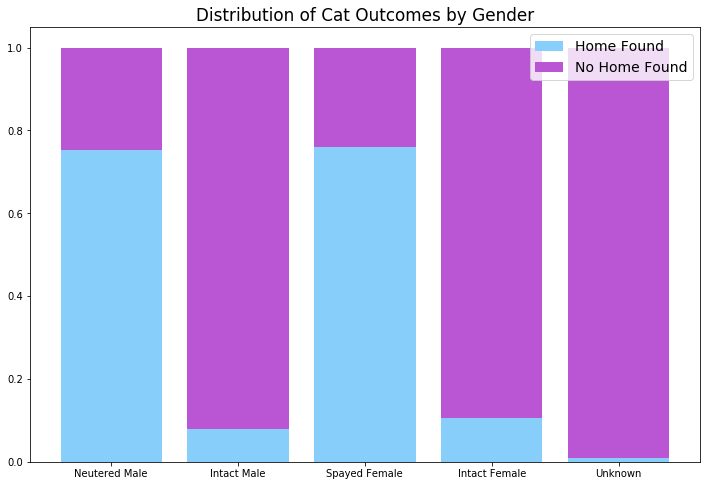

In [8]:
# Separate Cats by Sex upon Outcome
male_n = cats[cats['Sex upon Outcome'] == 'Neutered Male']
male_i = cats[cats['Sex upon Outcome'] == 'Intact Male']
female_s = cats[cats['Sex upon Outcome'] == 'Spayed Female']
female_i = cats[cats['Sex upon Outcome'] == 'Intact Female']
unknown = cats[cats['Sex upon Outcome'] == 'Unknown']

# find percentages of cats that found homes
cat_homes_pct = [(male_n['Found Home'] == 1).sum()/male_n.shape[0],
             (male_i['Found Home'] == 1).sum()/male_i.shape[0],
             (female_s['Found Home'] == 1).sum()/female_s.shape[0],
             (female_i['Found Home'] == 1).sum()/female_i.shape[0],
             (unknown['Found Home'] == 1).sum()/unknown.shape[0]]

cat_no_homes_pct = [(male_n['Found Home'] == 0).sum()/male_n.shape[0],
             (male_i['Found Home'] == 0).sum()/male_i.shape[0],
             (female_s['Found Home'] == 0).sum()/female_s.shape[0],
             (female_i['Found Home'] == 0).sum()/female_i.shape[0],
             (unknown['Found Home'] == 0).sum()/unknown.shape[0]]

# Create stacked bar chart to compare outcome vs. sex upon outcome
fig, ax = plt.subplots(figsize=(12,8))
plt.rc('font', size=14)

ind = np.arange(5)

p1 = ax.bar(ind,
            cat_homes_pct,
            color='lightskyblue')

p2 = ax.bar(ind,
            cat_no_homes_pct,
            bottom=cat_homes_pct,
            color='mediumorchid')

ax.set_title('Distribution of Cat Outcomes by Gender')
ax.set_xticks(ind)
ax.set_xticklabels(('Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female', 'Unknown'))

ax.legend((p1[0], p2[0]), ('Home Found', 'No Home Found'), loc='best')
ax.autoscale_view()

plt.show()

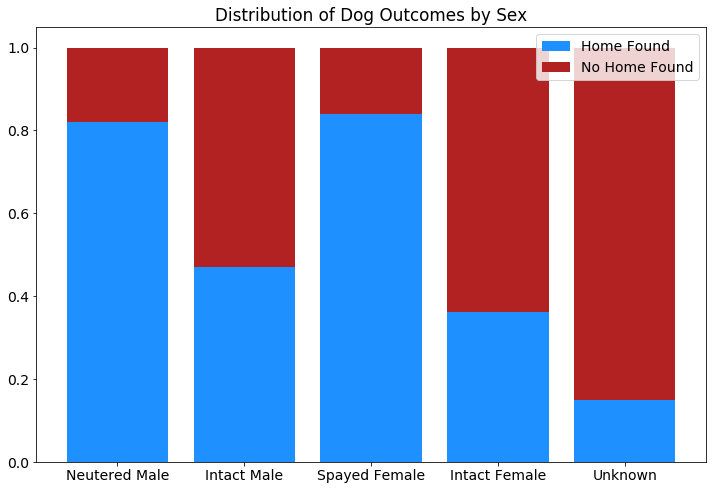

In [9]:
# Separate dogs by Sex upon Outcome
male_n = dogs[dogs['Sex upon Outcome'] == 'Neutered Male']
male_i = dogs[dogs['Sex upon Outcome'] == 'Intact Male']
female_s = dogs[dogs['Sex upon Outcome'] == 'Spayed Female']
female_i = dogs[dogs['Sex upon Outcome'] == 'Intact Female']
unknown = dogs[dogs['Sex upon Outcome'] == 'Unknown']

# find percentages of dogs that found homes
dog_homes_pct = [(male_n['Found Home'] == 1).sum()/male_n.shape[0],
             (male_i['Found Home'] == 1).sum()/male_i.shape[0],
             (female_s['Found Home'] == 1).sum()/female_s.shape[0],
             (female_i['Found Home'] == 1).sum()/female_i.shape[0],
             (unknown['Found Home'] == 1).sum()/unknown.shape[0]]

dog_no_homes_pct = [(male_n['Found Home'] == 0).sum()/male_n.shape[0],
             (male_i['Found Home'] == 0).sum()/male_i.shape[0],
             (female_s['Found Home'] == 0).sum()/female_s.shape[0],
             (female_i['Found Home'] == 0).sum()/female_i.shape[0],
             (unknown['Found Home'] == 0).sum()/unknown.shape[0]]

# Create stacked bar chart to compare outcome vs. sex upon outcome
fig, ax = plt.subplots(figsize=(12,8))
plt.rc('font', size=14)

ind = np.arange(5)

p1 = ax.bar(ind,
            dog_homes_pct,
            color='dodgerblue')

p2 = ax.bar(ind,
            dog_no_homes_pct,
            bottom=dog_homes_pct,
            color='firebrick')

ax.set_title('Distribution of Dog Outcomes by Sex')
ax.set_xticks(ind)
ax.set_xticklabels(('Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female', 'Unknown'))

ax.legend((p1[0], p2[0]), ('Home Found', 'No Home Found'), loc='best')
ax.autoscale_view()

plt.show()

In [10]:
# Label groups to compare
group_1 = (data['Sex upon Outcome'].str.contains('Male'))
group_2 = (data['Sex upon Outcome'].str.contains('Female'))
label_1 = 'Male'
label_2 = 'Female'

# Calculate Test Statistics
significance_test(group_1, label_1, group_2, label_2)

# of Male entries: 35802
# of Female entries: 33021
fraction of Male entries: 0.5004
fraction of Female entries: 0.4615
Percent of successful placement in permanent homes for all entries: 63.82 %
Percent of successful callbacks for Male entries: 66.89 %
Percent of successful callbacks for Female entries: 65.59 %
Margin of Error: 0.0037
p value via proportion comparison test: 0.00040


The statistical analysis above confirms that gender is also a influencing factor in whether or not animals are place in a permanent home.

#### iii. Breed (Mixed vs. Pure)

We will next test to see whether or not there is a bias in preference for animals that are either purebred or mixed for adoption.

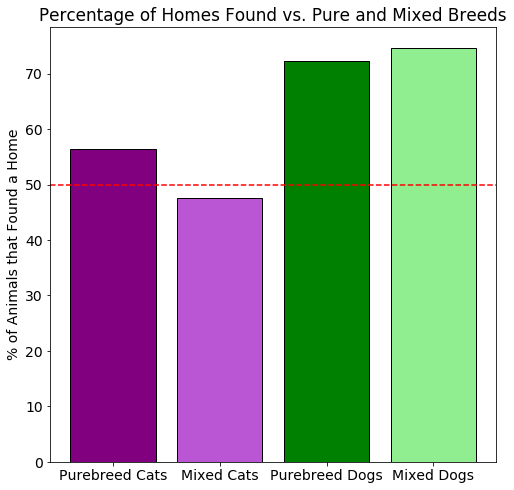

In [11]:
# Cat Breed vs. Mixed
mixed_cats = cats[cats['Breed'].str.contains('Mix')]['Found Home']
pure_cats = cats[~cats['Breed'].str.contains('Mix')]['Found Home']

pure_cats_fh = 100*(pure_cats == 1).sum()/pure_cats.shape[0]
mixed_cats_fh = 100*(mixed_cats == 1).sum()/mixed_cats.shape[0]

# Dog Breed vs. Mixed
mixed_dogs = dogs[dogs['Breed'].str.contains('Mix')]['Found Home']
pure_dogs = dogs[~dogs['Breed'].str.contains('Mix')]['Found Home']

pure_dogs_fh = 100*(pure_dogs == 1).sum()/pure_dogs.shape[0]
mixed_dogs_fh = 100*(mixed_dogs == 1).sum()/mixed_dogs.shape[0]

# Generate plot
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(list(range(4)), 
        np.array([pure_cats_fh, mixed_cats_fh, pure_dogs_fh, mixed_dogs_fh]), 
        color=['purple','mediumorchid','green','lightgreen'], 
        edgecolor='k'
       )
ax.set_title('Percentage of Homes Found vs. Pure and Mixed Breeds')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(('Purebreed Cats', 'Mixed Cats', 'Purebreed Dogs', 'Mixed Dogs'))
plt.ylabel('% of Animals that Found a Home')

# Draw a line at 50%
plt.axhline(y=50, color='r', linestyle='--')

# Display plot
plt.show()

We can see that there are two opposing trends for cats and dogs here. For cats, purebreeds have a noticeably higher rate of adoption, while dogs see a drop in adoption rates for those that are not mixed breeds. This may be related to the high occurences of Domestic Shorthair cats at the center. When people come in to browse for pet adoption, it is easier for purebreeds to stand out in appearance when most cats are similar. The distribution of breeds for dogs are much more varied, and so this may not have the same impact on adoptions for dogs.

We can test the statistical significance of purebreed vs. mixed animals on outcome as well:

In [12]:
# Label groups to compare
group_1 = (data['Breed'].str.contains('Mix'))
group_2 = (~data['Breed'].str.contains('Mix'))
label_1 = 'Mixed'
label_2 = 'Pure'

# Calculate Test Statistics
significance_test(group_1, label_1, group_2, label_2)

# of Mixed entries: 67907
# of Pure entries: 3638
fraction of Mixed entries: 0.9492
fraction of Pure entries: 0.0508
Percent of successful placement in permanent homes for all entries: 63.82 %
Percent of successful callbacks for Mixed entries: 63.52 %
Percent of successful callbacks for Pure entries: 69.41 %
Margin of Error: 0.0082
p value via proportion comparison test: 0.00000


#### iv. Colors (with Secondary Color vs. Without)

Since we have indications so far that less common or exotic animal appearances may positively influence whether or not they are adopted, it would be a good idea to check whether or not the outcome may depend on if the animal has a mixed color coat.

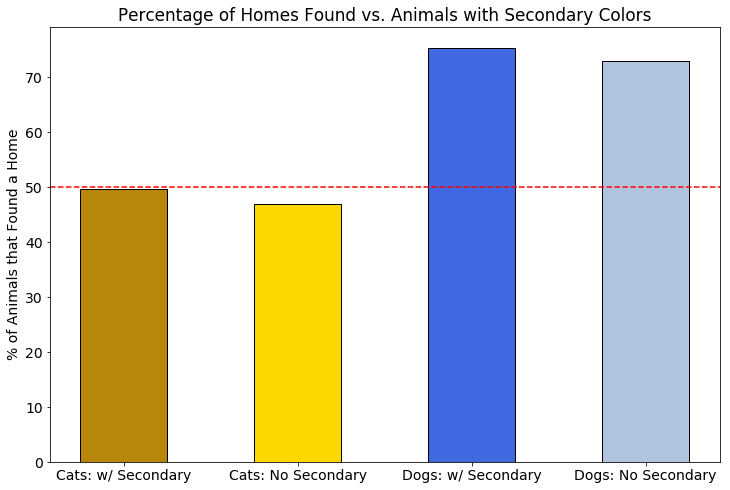

In [13]:
# % of Homes Found vs. cats with secondary colors
cats_secondary = cats[cats['Secondary Color'].notnull()]
cats_no_secondary = cats[~cats['Secondary Color'].notnull()]

cats_secondary_fh = 100*(cats_secondary['Found Home'] == 1).sum()/cats_secondary.shape[0]
cats_no_secondary_fh = 100*(cats_no_secondary['Found Home'] == 1).sum()/cats_no_secondary.shape[0]

# % of Homes Found vs. dogs with secondary colors
dogs_secondary = dogs[dogs['Secondary Color'].notnull()]
dogs_no_secondary = dogs[~dogs['Secondary Color'].notnull()]

dogs_secondary_fh = 100*(dogs_secondary['Found Home'] == 1).sum()/dogs_secondary.shape[0]
dogs_no_secondary_fh = 100*(dogs_no_secondary['Found Home'] == 1).sum()/dogs_no_secondary.shape[0]


# Generate plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(list(range(4)),
       np.array([cats_secondary_fh, cats_no_secondary_fh, dogs_secondary_fh, dogs_no_secondary_fh]),
       color=['darkgoldenrod','gold','royalblue','lightsteelblue'],
       width=0.5,
       edgecolor='k'
       )
ax.set_title('Percentage of Homes Found vs. Animals with Secondary Colors')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(('Cats: w/ Secondary', 'Cats: No Secondary', 'Dogs: w/ Secondary', 'Dogs: No Secondary'))
plt.ylabel('% of Animals that Found a Home')

# Draw a line at 50%
plt.axhline(y=50, color='r', linestyle='--')

# Display plot
plt.show()

The data above shows that for both cats and dogs, a secondary color seems to slightly improve the rates of adoption. Animals with distinctive color combinations in their coats may stand out more visually to potential pet owners. In order to verify this for all animals, statistical tests are carried out below:

In [14]:
# Label groups to compare
group_1 = (data['Secondary Color'].isnull())
group_2 = (~data['Secondary Color'].isnull())
label_1 = 'Primary Color Only'
label_2 = 'Secondary Color'

# Calculate Test Statistics
significance_test(group_1, label_1, group_2, label_2)

# of Primary Color Only entries: 33693
# of Secondary Color entries: 37852
fraction of Primary Color Only entries: 0.4709
fraction of Secondary Color entries: 0.5291
Percent of successful placement in permanent homes for all entries: 63.82 %
Percent of successful callbacks for Primary Color Only entries: 58.56 %
Percent of successful callbacks for Secondary Color entries: 68.50 %
Margin of Error: 0.0036
p value via proportion comparison test: 0.00000


#### v. Age

We can also look at age distribution of both cats and dogs to see the effect of age on permanent home placement.

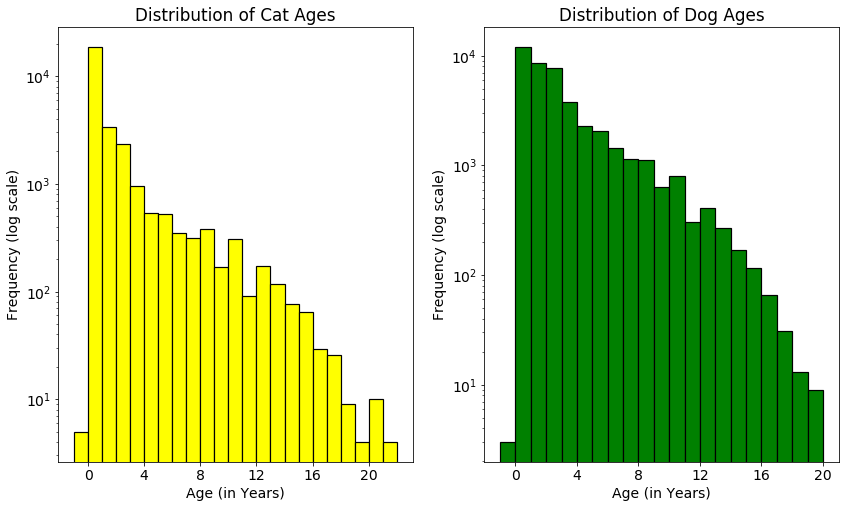

In [15]:
# Convert ages to years
cat_ages_in_years = cats['Age upon Outcome'].apply(lambda x: x//timedelta(days=365.25))
dog_ages_in_years = dogs['Age upon Outcome'].apply(lambda x: x//timedelta(days=365.25))

# Plot distribution of cat ages
plt.subplots(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.hist(cat_ages_in_years, bins=23, color='yellow', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Cat Ages')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Age (in Years)')
plt.yscale('log')
plt.xticks([0, 4, 8, 12, 16, 20])

# Plot distribution of dog ages
plt.subplot(1, 2, 2)
plt.hist(dog_ages_in_years, bins=21, color='green', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Dog Ages')
plt.yscale('log')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])

plt.show()

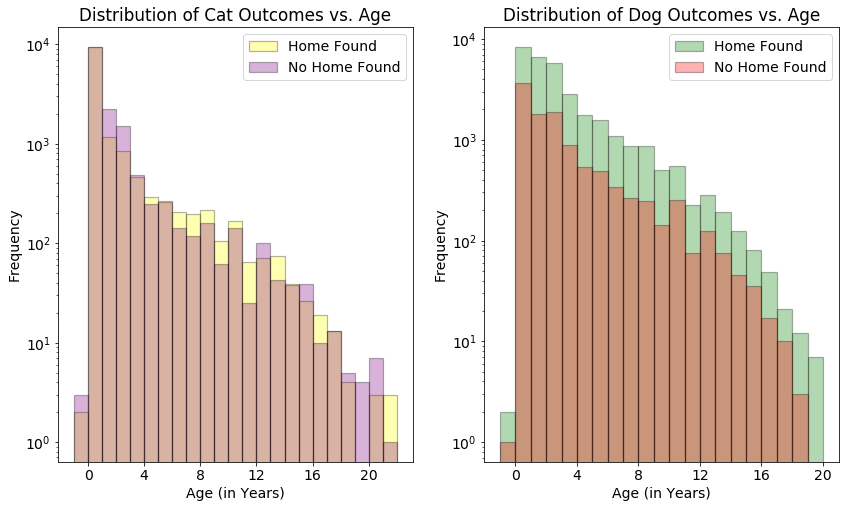

In [16]:
cat_ages_in_years[cats['Found Home'] == 0]

# Plot distribution of cat ages for cats who found homes
plt.subplots(figsize=(14,8))
plt.subplot(1, 2, 1)
cats_fh_freq, cats_bins, _ = plt.hist(cat_ages_in_years[cats['Found Home'] == 1],
                                      bins=23, 
                                      color='yellow', 
                                      edgecolor='black', 
                                      linewidth=1.2, 
                                      alpha = 0.3
                                     )
cats_nofh_freq, _, _ = plt.hist(cat_ages_in_years[cats['Found Home'] == 0],
                                bins=23,
                                color='purple',
                                edgecolor='black',
                                linewidth=1.2,
                                alpha = 0.3
                               )
plt.legend(['Home Found', 'No Home Found'])
plt.title('Distribution of Cat Outcomes vs. Age')
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.yscale('log')
plt.xticks([0, 4, 8, 12, 16, 20])

# Plot distribution of dog ages
plt.subplot(1, 2, 2)
dogs_fh_freq, dogs_bins, _ = plt.hist(dog_ages_in_years[dogs['Found Home'] == 1],
                                      bins=21, 
                                      color='green', 
                                      edgecolor='black',
                                      linewidth=1.2,
                                      alpha = 0.3
                                     )
dogs_nofh_freq, _, _ = plt.hist(dog_ages_in_years[dogs['Found Home'] == 0],
                                bins=20, 
                                color='red', 
                                edgecolor='black', 
                                linewidth=1.2, 
                                alpha = 0.3
                               )
plt.legend(['Home Found', 'No Home Found'])
plt.title('Distribution of Dog Outcomes vs. Age')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])

plt.show()

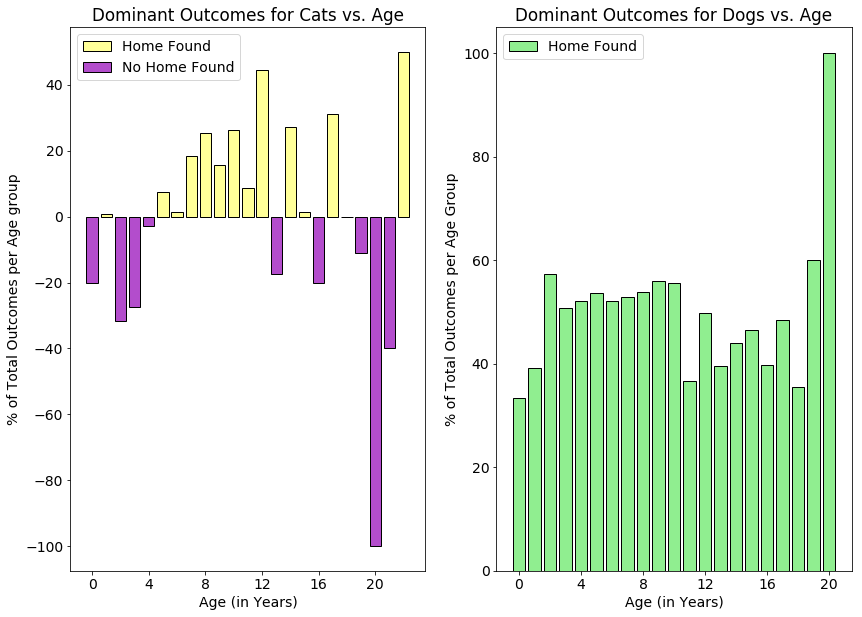

In [17]:
# Add a zero value to the last bin of dogs_nofh_freq so that it matches the number of bins of dogs who found homes
dogs_nofh_freq2 = np.append(dogs_nofh_freq, 0)

# Initialize figure
plt.subplots(figsize=(14,10))

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 1)

# Generate differenct colors for positive and negative values
cat_colors = np.array([(0.7,0.3,0.8)]*len(cats_fh_freq))
cat_colors[cats_fh_freq-cats_nofh_freq >= 0] = (1,1,0.6)

# Create bar graph
barlist=plt.bar(cats_bins[1:], 
                100*(cats_fh_freq-cats_nofh_freq)/(cats_fh_freq+cats_nofh_freq), 
                color=cat_colors, 
                edgecolor='k'
               )
plt.ylabel('% of Total Outcomes per Age group')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Cats vs. Age')

# Create a legend for cat outcomes plot
pos_patch = mpatches.Patch(facecolor=(1,1,0.6), edgecolor='k', label='Home Found')
neg_patch = mpatches.Patch(facecolor=(0.7,0.3,0.8), edgecolor='k', label='No Home Found')
plt.legend(handles=[pos_patch, neg_patch])

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 2)
plt.bar(dogs_bins[1:], 
        100*(dogs_fh_freq-dogs_nofh_freq2)/(dogs_fh_freq+dogs_nofh_freq2), 
        color='lightgreen', 
        edgecolor='k'
       )
plt.ylabel('% of Total Outcomes per Age Group')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Dogs vs. Age')
plt.legend(['Home Found'])


plt.show()

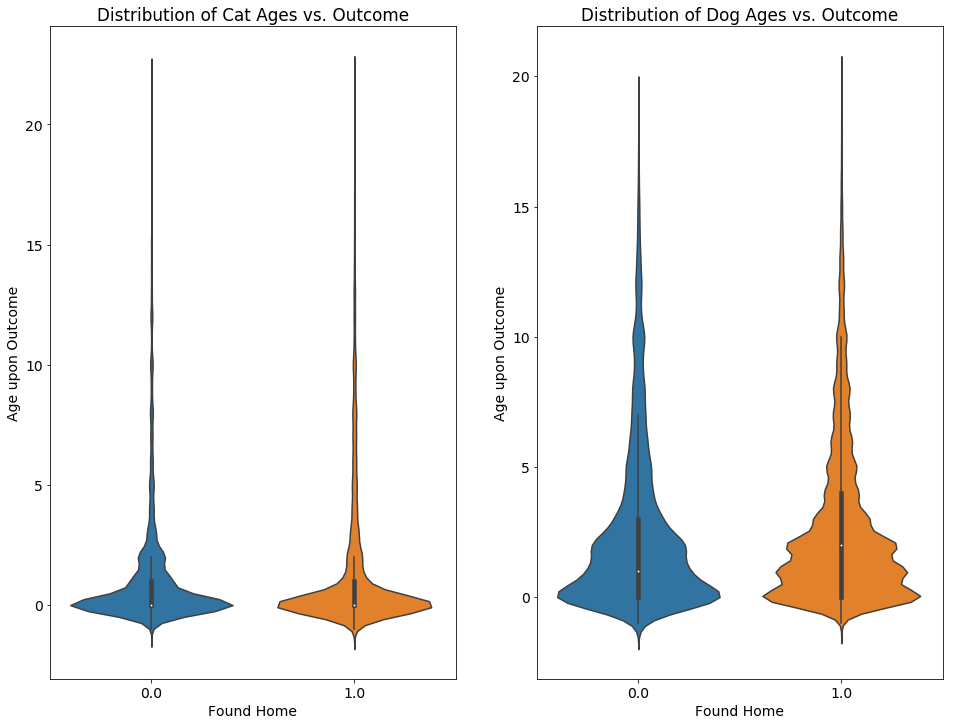

In [18]:
# Create violin plot to show age distribution vs. cats that found a home and did not find a home
plt.subplots(figsize=(16,12))
plt.subplot(1, 2, 1)
sns.violinplot(x=cats['Found Home'], y=cat_ages_in_years)
plt.title('Distribution of Cat Ages vs. Outcome')

plt.subplot(1, 2, 2)
sns.violinplot(x=dogs['Found Home'], y=dog_ages_in_years)
plt.rc('font', size=14)
plt.title('Distribution of Dog Ages vs. Outcome')

plt.show()

The plots above show that while all age groups seem to have a higher frequency of dogs that are placed/returned to their homes, cats have a more complicated distribution. Both young (< 5 years old) and old (> 12 years old) seem to have mixed chances of being placed in a permanent home.

One interesting note is that in both cases, the oldest animals seem to have higher chances of adoption.

### Closing Remarks

In this project the Austin Animal Center dataset was investigated with a wide range of metrics to suggest which factors seem to influence the animals that are able to be placed in permanent homes vs. those which are not. It was shown that dogs have a much higher placement rate overall than cats, while attributes such as gender, breed and color seem to have a statistically significant influence on the placement rates for both cats and dogs.

### Thanks for Reading!